In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/input/new_feats_data.csv'

data = pd.read_csv(file_path)
duas_horas = 120

In [3]:
data.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,MONTH(alertDateTimeSB),MONTH(jamUpdateDateTimeSB),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(gps_datetimeSB),WEEKDAY(precipitationTimeSB),WEEKDAY(alertDateTimeSB),WEEKDAY(jamUpdateDateTimeSB)
0,68,3,Route_160,low_frequency,12580,-8.036231,-34.962342,2505.0,12021,NaN,...,12,12,0,0,0,0,0,0,0,0
1,68,3,Route_160,low_frequency,12581,-8.034150,-34.960756,2794.0,12021,130.0,...,12,12,0,0,0,0,0,0,0,0
2,68,3,Route_160,low_frequency,12582,-8.032878,-34.959775,2971.0,12021,NaN,...,12,12,0,0,0,0,0,0,0,0
3,68,3,Route_160,low_frequency,12583,-8.031478,-34.958622,3171.0,12021,131.0,...,12,12,0,0,0,0,0,0,0,0
4,68,3,Route_160,low_frequency,12585,-8.030508,-34.957567,3392.0,12021,136.0,...,12,12,0,0,0,0,0,0,0,0


In [4]:
data.headway

0           85
1           90
2           99
3          116
4          116
          ... 
1432628     52
1432629     53
1432630     53
1432631     53
1432632     11
Name: headway, Length: 1432633, dtype: int64

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


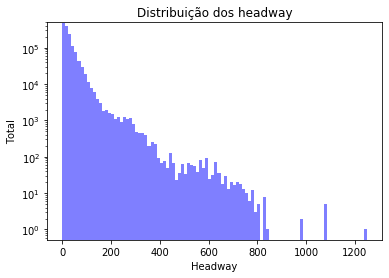

In [73]:
num_bins = 100
plt.hist(data.headway, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.ylim([0, 500000])
plt.xlabel('Headway')
plt.ylabel('Total')
plt.title('Distribuição dos headway')
plt.show()

In [6]:
print("Min: " + str(min(data.headway)))
print("Max: " + str(max(data.headway)))

Min: 0
Max: 1248


In [7]:
print("Quantidade de dados, dos 11 dias, com headway fora do normal (headway > 2h):")
data[data.headway > duas_horas].shape

Quantidade de dados, dos 11 dias, com headway fora do normal (headway > 2h):


(34083, 111)

In [8]:
print("Quantidade de dados, dos 11 dias, com headway relativamente normal (headway <= 2h):")
data[data.headway <= duas_horas].shape

Quantidade de dados, dos 11 dias, com headway relativamente normal (headway <= 2h):


(1398550, 111)

In [9]:
print("Porcentagem de headways muito altos (headway > 2h):")
perc_hd_alto = data[data.headway > duas_horas].shape[0] / data.shape[0]
perc_hd_alto
print(str(perc_hd_alto*100) + "%")

Porcentagem de headways muito altos (headway > 2h):
2.3790461339366047%


In [10]:
hd_alto = data[data.headway > duas_horas]
hd_alto.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,MONTH(alertDateTimeSB),MONTH(jamUpdateDateTimeSB),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(gps_datetimeSB),WEEKDAY(precipitationTimeSB),WEEKDAY(alertDateTimeSB),WEEKDAY(jamUpdateDateTimeSB)
12,68,3,Route_160,low_frequency,12595,-8.045325,-34.930454,6806.0,12021,166.0,...,12,12,0,0,0,0,0,0,0,0
13,68,3,Route_160,low_frequency,12597,-8.047665,-34.926340,7328.0,12021,NaN,...,12,12,0,0,0,0,0,0,0,0
14,68,3,Route_160,low_frequency,12599,-8.049719,-34.922705,7789.0,12021,173.0,...,12,12,0,0,0,0,0,0,0,0
15,68,3,Route_160,low_frequency,12600,-8.050913,-34.920432,8072.0,12021,NaN,...,12,12,0,0,0,0,0,0,0,0
16,68,3,Route_160,low_frequency,12602,-8.052784,-34.917212,8483.0,12021,NaN,...,12,12,0,0,0,0,0,0,0,0


In [11]:
print("Quantidade de ônibus diferentes com headway alto:")
print(hd_alto.groupby(['busCode'])['busCode'].nunique().count())

print("Quantidade de ônibus diferentes:")
print(data.groupby(['busCode'])['busCode'].nunique().count())

Quantidade de ônibus diferentes com headway alto:
670
Quantidade de ônibus diferentes:
789


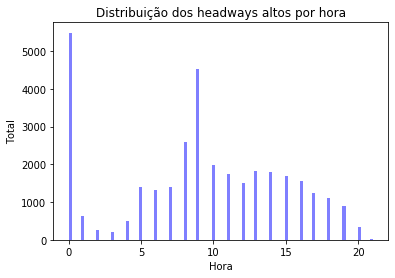

In [12]:
num_bins = 100
plt.hist(hd_alto.GPShour, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Hora')
plt.ylabel('Total')
plt.title('Distribuição dos headways altos por hora')
plt.show()

Arquivos com as datas, antes do processo de FE gerar novas feats.

In [52]:
file_path = '../data/input/integrated_data_before_new_feats.csv'
two_hours = 120
four_hours = 240
six_hours = 360
ten_hours = 600

data_before_fe = pd.read_csv(file_path)

In [14]:
# only higher headways
hd_higher_with_data = data_before_fe[data_before_fe.headway > two_hours]

In [53]:
# only higher headways
hd_higher_4h_data = data_before_fe[data_before_fe.headway > four_hours]
hd_higher_6h_data = data_before_fe[data_before_fe.headway > six_hours]
hd_higher_10h_data = data_before_fe[data_before_fe.headway > ten_hours]

In [64]:
print(len(hd_higher_10h_data))

362


In [8]:
output_path = '../data/input/only_higher_headway_with_data.csv'
hd_higher_with_data.to_csv(output_path)

In [9]:
data_before_fe.columns

Index(['route', 'tripNum', 'shapeId', 'routeFrequency', 'shapeSequence',
       'shapeLat', 'shapeLon', 'distanceTraveledShape', 'busCode',
       'gpsPointId', 'gpsLat', 'gpsLon', 'distanceToShapePoint',
       'gps_datetime', 'stopPointId', 'problem', 'precipitation',
       'precipitationTime', 'alertDateTime', 'alertSubtype', 'alertType',
       'alertRoadType', 'alertConfidence', 'alertNComments', 'alertNImages',
       'alertNThumbsUp', 'alertReliability', 'alertReportMood',
       'alertReportRating', 'alertSpeed', 'alertLatitude', 'alertLongitude',
       'alertDistanceToClosestShapePoint', 'alertIsJamUnifiedAlert',
       'alertInScale', 'jamUpdateDateTime', 'jamBlockType', 'jamDelay',
       'jamLength', 'jamLevel', 'jamSeverity', 'jamSpeedKM',
       'jamDistanceToClosestShapePoint', 'headway', 'headwayThreshold',
       'busBunching', 'GPShour', 'tripNumSB', 'shapeSequenceSB', 'shapeLatSB',
       'shapeLonSB', 'distanceTraveledShapeSB', 'busCodeSB', 'gpsPointIdSB',
       

In [65]:
hd_higher_10h_data[["route", "shapeId", "shapeSequence", "stopPointId", "busCode", "gps_datetime", "busCodeSB", "gps_datetimeSB", "headway", "problem"]]

,route,shapeId,shapeSequence,stopPointId,busCode,gps_datetime,busCodeSB,gps_datetimeSB,headway,problem
19000,287,Route_805,79258,451,12030,2018-12-11 07:22:06,12253,2018-12-11 17:43:56,621,NO_PROBLEM
31817,37,Route_163,12757,2862,12048,2018-12-04 12:10:27,12826,2018-12-04 23:28:18,677,NO_PROBLEM
56228,68,Route_161,12708,2922,12104,2018-12-05 00:21:03,12207,2018-12-05 16:40:55,979,NO_PROBLEM
56229,68,Route_161,12710,2920,12104,2018-12-05 00:21:33,12207,2018-12-05 16:46:34,985,NO_PROBLEM
77280,30,Route_47,3717,2752,12129,2018-12-07 05:02:23,12111,2018-12-07 16:16:32,674,NO_PROBLEM
...,...,...,...,...,...,...,...,...,...,...
1424719,106,Route_547,71958,4471,81967,2018-12-05 05:17:48,81809,2018-12-05 19:07:17,829,NO_PROBLEM
1424720,106,Route_547,71977,4480,81967,2018-12-05 05:20:48,81809,2018-12-05 19:12:19,831,NO_PROBLEM
1424721,106,Route_547,71987,4487,81967,2018-12-05 05:21:28,81809,2018-12-05 19:12:38,831,BETWEEN
1424722,106,Route_547,71997,4477,81967,2018-12-05 05:22:05,81809,2018-12-05 19:13:25,831,BETWEEN


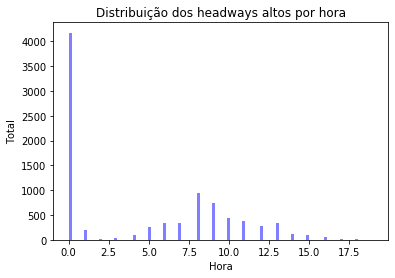

In [51]:
num_bins = 100
plt.hist(hd_higher_4h_data.GPShour, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Hora')
plt.ylabel('Total')
plt.title('Distribuição dos headways altos por hora')
plt.show()

In [51]:
hd_higher_with_data[hd_higher_with_data.gps_datetime.str.contains('2018-12-03')][["route", "shapeId", "shapeSequence", "stopPointId", "busCode", "gps_datetime", "busCodeSB", "gps_datetimeSB", "headway", "problem"]][(hd_higher_with_data.busCode == 81987) & (hd_higher_with_data.stopPointId == 5297)].sort_values(by=['busCode','gps_datetime'])

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,route,shapeId,shapeSequence,stopPointId,busCode,gps_datetime,busCodeSB,gps_datetimeSB,headway,problem
1654104,138,Route_320,38748,5297,81987,2018-12-03 06:10:38,81822,2018-12-03 17:08:37,657,NO_PROBLEM
1654189,138,Route_321,39197,5297,81987,2018-12-03 07:48:05,81822,2018-12-03 17:08:37,560,NO_PROBLEM
1654190,138,Route_320,38748,5297,81987,2018-12-03 07:55:35,81822,2018-12-03 17:08:37,553,NO_PROBLEM
1654274,138,Route_321,39197,5297,81987,2018-12-03 10:20:10,81822,2018-12-03 17:08:37,408,NO_PROBLEM
1654275,138,Route_320,38748,5297,81987,2018-12-03 10:25:10,81822,2018-12-03 17:08:37,403,NO_PROBLEM
1654359,138,Route_321,39197,5297,81987,2018-12-03 11:58:38,81822,2018-12-03 17:08:37,309,NO_PROBLEM
1654360,138,Route_320,38748,5297,81987,2018-12-03 14:10:39,81822,2018-12-03 17:08:37,177,TRIP_PROBLEM


Analisando a saída do BULMA/BUSTE para confirmar os headways altos.

In [61]:
file_path = '../data/input/BuLMABusTE_2018-12-04.csv'
duas_horas = 120

bulma_data = pd.read_csv(file_path)
bulma_data.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,distanceToShapePoint,gps_datetime,stopPointId,streetName,problem
0,548,1,Route_1391,high_frequency,144005,-7.929195,-34.890789,2.0,81508,508695,-7.92917856517,-34.8907557363,4.075576,2018-12-04 09:27:36,4542,-,NO_PROBLEM
1,548,1,Route_1391,high_frequency,144013,-7.929116,-34.891764,193.0,81508,-,-,-,-,2018-12-04 09:34:51,7400,Rua Surubim,BETWEEN
2,548,1,Route_1391,high_frequency,144020,-7.928843,-34.892915,336.0,81508,-,-,-,-,2018-12-04 09:35:25,4543,Rua Surubim,BETWEEN
3,548,1,Route_1391,high_frequency,144027,-7.928023,-34.894441,538.0,81508,508713,-7.92802288157,-34.8943958437,5.021622,2018-12-04 09:36:34,4544,-,NO_PROBLEM
4,548,1,Route_1391,high_frequency,144032,-7.927986,-34.895754,715.0,81508,508714,-7.92795340844,-34.8957557423,3.6051116,2018-12-04 09:37:04,4545,-,NO_PROBLEM


In [67]:
bulma_data[126725:][(bulma_data.stopPointId == 2862)][["route", "shapeId", "shapeSequence", "stopPointId", "busCode", "gps_datetime", "problem"]].sort_values(by=['gps_datetime'])#2331 stop

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,route,shapeId,shapeSequence,stopPointId,busCode,gps_datetime,problem
152729,37,Route_162,12756,2862,-,-,BETWEEN
152731,37,Route_162,12756,2862,-,-,BETWEEN
152732,37,Route_162,12756,2862,-,-,BETWEEN
152733,37,Route_162,12756,2862,-,-,BETWEEN
173175,37,Route_163,12757,2862,-,-,BETWEEN
173176,37,Route_163,12757,2862,-,-,BETWEEN
126725,37,Route_163,12757,2862,12048,2018-12-04 12:10:27,NO_PROBLEM
126736,37,Route_162,12756,2862,12048,2018-12-04 12:43:45,NO_PROBLEM
126743,37,Route_162,12756,2862,12048,2018-12-04 19:11:02,TRIP_PROBLEM


In [66]:
bulma_data[(bulma_data.busCode == 12048) & (bulma_data.gps_datetime == "2018-12-04 12:10:27")][["route", "shapeId", "shapeSequence", "stopPointId", "busCode", "gps_datetime"]].sort_values(by=['gps_datetime'])#2331 stop

,route,shapeId,shapeSequence,stopPointId,busCode,gps_datetime
126725,37,Route_163,12757,2862,12048,2018-12-04 12:10:27


GPS data

In [33]:
file_path = '../data/input/GPS_data_2018-12-03.csv'
duas_horas = 120

gps_data = pd.read_csv(file_path)
gps_data.head()

,Unidad,Instante,Estado,Comunica,CoordX,CoordY,Linea,Ruta,Posicion,Viaje,Velocidad
0,12021,2018-12-03 04:21:02,5,1,-8.037864,-34.981669,68,160,0,2,0.0
1,12021,2018-12-03 04:21:32,5,1,-8.037873,-34.981687,68,160,0,2,0.0
2,12021,2018-12-03 04:22:02,5,1,-8.037873,-34.981687,68,160,0,2,0.0
3,12021,2018-12-03 04:22:32,5,1,-8.037873,-34.981687,68,160,0,2,0.0
4,12021,2018-12-03 04:23:02,5,1,-8.037863,-34.981687,68,160,0,2,0.0


In [34]:
gps_data[gps_data.Unidad == 12022]

,Unidad,Instante,Estado,Comunica,CoordX,CoordY,Linea,Ruta,Posicion,Viaje,Velocidad
1534,12022,2018-12-03 07:29:30,5,1,-8.038986,-34.964423,68,160,2124,6,11.0
1535,12022,2018-12-03 07:30:00,5,1,-8.038869,-34.964331,68,160,2140,6,1.0
1536,12022,2018-12-03 07:30:30,5,0,-8.038869,-34.964331,68,160,2140,6,1.0
1537,12022,2018-12-03 07:31:00,5,1,-8.035878,-34.962086,68,160,2553,6,24.0
1538,12022,2018-12-03 07:31:30,5,1,-8.034842,-34.961301,68,160,2696,6,17.0
...,...,...,...,...,...,...,...,...,...,...,...
2522,12022,2018-12-03 20:27:55,5,0,-8.030364,-34.958205,68,160,3304,14,0.0
2523,12022,2018-12-03 20:28:25,5,1,-8.030373,-34.958205,68,160,3304,14,0.0
2524,12022,2018-12-03 20:28:55,5,1,-8.030832,-34.956819,68,160,3486,14,21.0
2525,12022,2018-12-03 20:29:25,5,1,-8.031541,-34.955852,68,160,3617,14,15.0


Analisando uma saída da integração para checar a questãos das paradas por shapes

In [2]:
file_path = '../data/input/headway_output_2018-12-03.csv'

headway_output = pd.read_csv(file_path)
headway_output.head()

/home/veruska/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,alertInScaleSB,jamUpdateDateTimeSB,jamExpirationDateTimeSB,jamBlockTypeSB,jamDelaySB,jamLengthSB,jamLevelSB,jamSeveritySB,jamSpeedKMSB,jamDistanceToClosestShapePointSB
0,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50661,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50662,320990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96,3,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50664,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
headway_output[["route", "shapeId", "shapeSequence", "headway", "busCode", "stopPointId", "shapeIdSB", "busCodeSB", "shapeSequenceSB"]][headway_output.busCode == 12162]

,route,shapeId,shapeSequence,headway,busCode,stopPointId,shapeIdSB,busCodeSB,shapeSequenceSB
7255,58,Route_123,9055,94,12162,2611,Route_123,12801,9055
7256,58,Route_123,9055,19,12162,2611,Route_123,12801,9055
7259,58,Route_123,9055,21,12162,2611,Route_123,12801,9055
7261,58,Route_123,9055,23,12162,2611,Route_123,12801,9055
7264,58,Route_123,9055,193,12162,2611,Route_123,12809,9055
7265,58,Route_123,9055,141,12162,2611,Route_123,12809,9055
7266,58,Route_123,9055,95,12162,2611,Route_123,12809,9055
7267,58,Route_123,9055,45,12162,2611,Route_123,12809,9055
7269,58,Route_123,9055,35,12162,2611,Route_123,12809,9055
7271,58,Route_123,9055,39,12162,2611,Route_123,12809,9055


In [5]:
file_path = '../data/input/headway_output_2018-12-03_new.csv'

headway_output_after_shape_key = pd.read_csv(file_path)
headway_output_after_shape_key[["route", "shapeId", "shapeSequence", "busCode", "stopPointId", "shapeIdSB", "busCodeSB", "shapeSequenceSB"]]

,route,shapeId,shapeSequence,busCode,stopPointId,shapeIdSB,busCodeSB,shapeSequenceSB
0,74,Route_174,13735,50222,3404,Route_174,50202,13735
1,74,Route_174,13735,50202,3404,Route_174,50282,13735
2,74,Route_174,13735,50282,3404,Route_174,50272,13735
3,74,Route_174,13735,50272,3404,Route_174,50212,13735
4,74,Route_174,13735,50212,3404,Route_174,50473,13735
5,74,Route_174,13735,50473,3404,Route_174,50232,13735
6,74,Route_174,13735,50232,3404,Route_174,50477,13735
7,74,Route_174,13735,50477,3404,Route_174,50222,13735
8,74,Route_174,13735,50222,3404,Route_174,50202,13735
9,74,Route_174,13735,50202,3404,Route_174,50272,13735
